In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
car_dataset = pd.read_csv('car data.csv')

In [ ]:
#printing the first few rows
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
#Printing the information
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
#printing the shape of the dataset
car_dataset.shape

(301, 9)

In [ ]:
#checking for duplicates
car_dataset.duplicated().sum()

2

In [ ]:
car_dataset.drop_duplicates()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [ ]:
#checking for missing values
car_dataset.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [ ]:
#checking the categorical values
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [ ]:
#encoding the categorical values
car_dataset['Fuel_Type'] = car_dataset['Fuel_Type'].replace({'Petrol': 0, 'Diesel': 1, 'CNG': 2}).astype('int64')
car_dataset['Seller_Type']= car_dataset['Seller_Type'].replace({'Dealer':0, 'Individual':1}).astype('int64')
car_dataset['Transmission']= car_dataset['Transmission'].replace({'Manual':0, 'Automatic':1}).astype('int64')


In [ ]:
#printing the first few rows to check the encoded datset
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


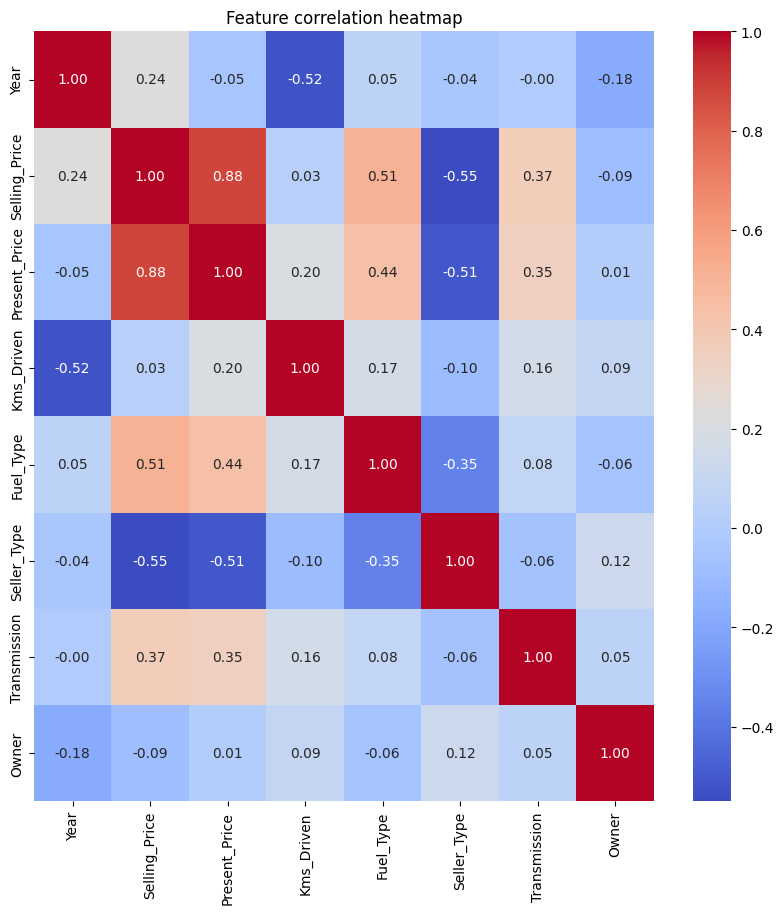

In [ ]:
#checking the correlation between various feature
corr = car_dataset.drop(['Car_Name'], axis = 1)
correlation = corr.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, annot = True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Feature correlation heatmap")
plt.show()

In [ ]:
X = car_dataset.drop(['Car_Name', 'Selling_Price', 'Owner'], axis = 1)
Y = car_dataset['Selling_Price']

In [ ]:
print(X)


     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission
0    2014           5.59       27000          0            0             0
1    2013           9.54       43000          1            0             0
2    2017           9.85        6900          0            0             0
3    2011           4.15        5200          0            0             0
4    2014           6.87       42450          1            0             0
..    ...            ...         ...        ...          ...           ...
296  2016          11.60       33988          1            0             0
297  2015           5.90       60000          0            0             0
298  2009          11.00       87934          0            0             0
299  2017          12.50        9000          1            0             0
300  2016           5.90        5464          0            0             0

[301 rows x 6 columns]


In [ ]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
#using linear regression model
lin_model = LinearRegression()

In [ ]:
#training the model
lin_model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
training_pred = lin_model.predict(X_train)

In [42]:
#checking the error
error = metrics.r2_score(Y_train, training_pred)
print("R square error:",error)

R square error: 0.8819624370065634


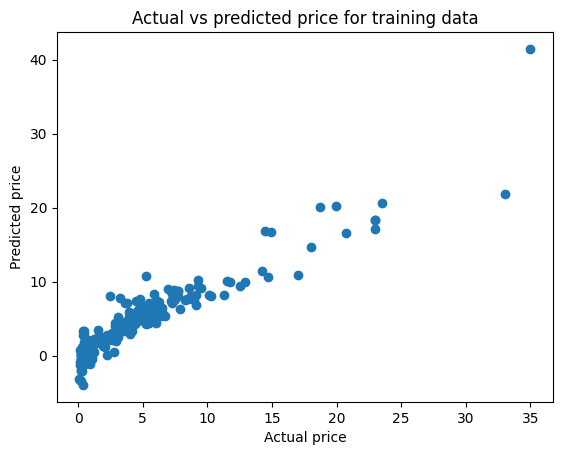

In [ ]:
plt.scatter(Y_train, training_pred)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual vs predicted price for training data")
plt.show()

In [ ]:
testing_pred = lin_model.predict(X_test)

In [43]:
error_test = metrics.r2_score(Y_test, testing_pred)
print("R square error:",error_test)
mean_error = metrics.mean_absolute_error(Y_test, testing_pred)
print("mean absolute error:", mean_error)

R square error: 0.8445222820553691
mean absolute error: 1.2553814427892958


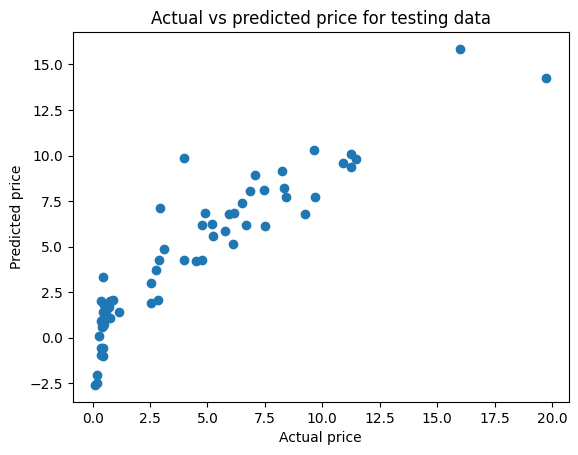

In [ ]:
plt.scatter(Y_test, testing_pred)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual vs predicted price for testing data")
plt.show()
